<a href="https://colab.research.google.com/github/PigeonLore/Sales-Prediction-Modeling/blob/main/Sales_Predictions_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.linear_model import Ridge
from sklearn.dummy import DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo | Data Science/Stack 2: Machine Learning/Week 1: Machine Learning/DataSets/sales_predictions.csv')

# 1. Inspecting Data

In [4]:
# Display Column names, counts of non-null values, and respective datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# Display statistics for numerical columns
df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# Display 
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


# 2. Correct Discrepancies

In [7]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

## 1. This standardizes all elements representing low fat and regular to discrete items

In [8]:
# Correct 

df['Item_Fat_Content'].replace({'low fat':0,'LF':0,'Low Fat':0,'reg':1,'Regular':1},inplace=True)

In [9]:
df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

## 2. Check for duplicates

In [10]:
# Display duplicated data

print('There are',df.duplicated().sum(),'duplicates')

There are 0 duplicates


## 3. Check for missing values

In [11]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
#Displays the percentage of missing values of each column

print(df.isna().sum()/len(df)*100,'%')

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 %


## These values can be imputed during 

# 3. Define target and feature sets then perform a train test split.

## 1. Spliting data

In [13]:
X = df.drop(columns=(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year']))

y = df['Item_Outlet_Sales']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
X_train.isna().any()

Item_Weight              True
Item_Fat_Content        False
Item_Visibility         False
Item_Type               False
Item_MRP                False
Outlet_Size              True
Outlet_Location_Type    False
Outlet_Type             False
dtype: bool

## 2. PreProcessing

In [16]:
# X_train['Outlet_Size'].replace({'High':0, 'Medium':1,'Small':2}, inplace = True)
X_train['Outlet_Size'].unique()

array(['Medium', 'Small', nan, 'High'], dtype=object)

### Column Selectors

In [17]:
#Instantiate column selectors

num_selector = make_column_selector(dtype_include='number')

cat_selector = make_column_selector(dtype_include='object')

In [18]:
# Instantiate Columns selectors

num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

In [19]:
# Instantiate imputers

freq_imputer = SimpleImputer(strategy='most_frequent')

mean_imputer = SimpleImputer(strategy='mean')

# Instantiate Scalers

scaler = StandardScaler()

# Instantiate OneHotEncoding

ohe = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

## Create Pipelines

In [20]:
num_pipe, cat_pipe = make_pipeline(mean_imputer, scaler), make_pipeline(freq_imputer, ohe)

print(num_pipe)
print(cat_pipe)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])
Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])


### Tuples

In [21]:
# Create Tupes

num_tuple = (num_pipe, num_selector)

cat_tuple = (cat_pipe, cat_selector)

### PreProcessor

In [22]:
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f538adb0760>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f538adb0460>)])

In [23]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f538adb0760>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f538adb0460>)])

# 3. Pipelines

In [24]:
X_train_processed = preprocessor.transform(X_train)

X_test_processed = preprocessor.transform(X_test)

X_train_processed[:10]

array([[ 8.17248678e-01, -7.40320602e-01, -7.12775072e-01,
         1.82810922e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 5.56339503e-01,  1.35076614e+00, -1.29105225e+00,
         6.03368881e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+

In [25]:
X_train_df = pd.DataFrame(X_train_processed)

X_train_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.817249,-0.740321,-0.712775,1.828109,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.556340,1.350766,-1.291052,0.603369,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.131512,1.350766,1.813319,0.244541,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.169219,-0.740321,-1.004931,-0.952591,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.528819,-0.740321,-0.965484,-0.336460,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,-0.832409,1.350766,4.309657,-0.044657,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,0.639356,-0.740321,1.008625,-1.058907,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,1.113736,-0.740321,-0.920527,1.523027,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,1.766009,-0.740321,-0.227755,-0.383777,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [26]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed.shape

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 30)




(6392, 30)

# Modeling Sales Predictions with Linear Regression Models

In [27]:
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Create functions for metrics

In [28]:
def regression_metrics(model, X_train=X_train_processed, X_test=X_test_processed, y_train=y_train, y_test=y_test):

    # Fit the model
    # model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate the regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Create a data frame to store the results
    results = pd.DataFrame({'Metrics': ['MAE', 'MSE', 'R2', 'RMSE'],
                            'Values': [mae, mse, r2, rmse]})

    # Print the results
    # print(model)
    # print(results)

    # Return the metrics as a dictionary
    return results, mae, mse, r2, rmse, y_pred


In [29]:
def model_score(model, X_train=X_train_processed, X_test=X_test_processed, y_train=y_train, y_test=y_test):
    # Fit the model
    # model.fit(X_train, y_train)

    # Calculate the training and testing scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Create a data frame to store the results
    results = pd.DataFrame({'Score Type': ['Training', 'Testing'],
                            'Score': [train_score, test_score]})

    # Print the results
    # print(model)
    # print(results.head())

    # Return the scores as a dictionary
    return results, test_score, train_score

# Fitting and evaluating models using regression metrics

## Random Forest Regressor

In [30]:
# Instance Random Forest Regressor

rfr = RandomForestRegressor()

In [31]:
# Fit data to Random Forest Regressor

rfr.fit(X_train_df, y_train)

RandomForestRegressor()

In [32]:
# Run regression metrics for model

regression_metrics(rfr)

(  Metrics        Values
 0     MAE  7.789811e+02
 1     MSE  1.265500e+06
 2      R2  5.413156e-01
 3    RMSE  1.124944e+03,
 778.9810603951197,
 1265499.8287790997,
 0.5413156047452812,
 1124.944366970696,
 array([ 689.542428,  917.545638,  716.893492, ..., 4937.47293 ,
        2003.219092, 2073.03488 ]))

In [33]:
model_score(rfr)

(  Score Type     Score
 0   Training  0.937326
 1    Testing  0.541316, 0.5413156047452812, 0.9373260540266987)

## Bagging Regressor

In [34]:
#Instance Bagging Regressor

BagReg = BaggingRegressor()

In [35]:
# Fit data to Bagging Regressor

BagReg.fit(X_train_df, y_train)

BaggingRegressor()

In [36]:
# Run regression metrics for trained model

regression_metrics(BagReg)

(  Metrics        Values
 0     MAE  8.117116e+02
 1     MSE  1.381177e+06
 2      R2  4.993879e-01
 3    RMSE  1.175235e+03,
 811.7116477991553,
 1381177.3198370533,
 0.49938793409384374,
 1175.2350062166518,
 array([ 919.1369 ,  836.04506,  596.95628, ..., 4546.81478, 1628.28048,
        1848.2608 ]))

## Decision Tree Regressor

In [37]:
# Instance Decision Tree Regressor

DecTreeReg = DecisionTreeRegressor()

In [38]:
# Fit data to Decision Tree Regressor

DecTreeReg.fit(X_train_processed, y_train)

DecisionTreeRegressor()

In [39]:
# Run regression metric for trained model

regression_metrics(DecTreeReg)

(  Metrics        Values
 0     MAE  1.073097e+03
 1     MSE  2.384273e+06
 2      R2  1.358126e-01
 3    RMSE  1.544109e+03,
 1073.0968231816048,
 2384273.4850400444,
 0.13581257244219436,
 1544.109285329262,
 array([ 805.618 , 1249.0408,  479.376 , ..., 6371.706 , 3243.7776,
        3089.9778]))

## Tuning Models

## Exploring hyperparameters

## Random Forest Regression

In [40]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [41]:
rfr_est_depths = [estimator.get_depth() for estimator in rfr.estimators_]
max(rfr_est_depths)

46

In [42]:
model_score(rfr)

(  Score Type     Score
 0   Training  0.937326
 1    Testing  0.541316, 0.5413156047452812, 0.9373260540266987)

In [43]:
print(max(rfr_est_depths))
print(min(rfr_est_depths))

46
30


### Random Forest Regression Hyperparameter tuning using loops

In [44]:
%%time

rfr_depths = range(1,max(rfr_est_depths))
rfr_scores = pd.DataFrame(index=rfr_depths, columns=['Test Score'])

for depth in rfr_depths:
  model = RandomForestRegressor(max_depth=depth, warm_start = True,  min_samples_leaf= 0.1)
  model.fit(X_train_processed, y_train)
 
  rfr_scores.loc[depth, 'Train Score'] = model.score(X_train_processed, y_train)
  rfr_scores.loc[depth, 'Test Score'] = model.score(X_test_processed, y_test)

rfr_scores

CPU times: user 30.9 s, sys: 55.5 ms, total: 31 s
Wall time: 31.2 s


,Test Score,Train Score
1,0.244293,0.255407
2,0.3145,0.315089
3,0.318454,0.319199
4,0.318977,0.319410
5,0.318342,0.319230
6,0.318369,0.319390
7,0.318866,0.318925
8,0.317819,0.319010
9,0.318393,0.319403
10,0.318793,0.319432


In [45]:
rfr_scores_sorted = rfr_scores.sort_values(by= 'Test Score', ascending = False)

In [46]:
rfr_scores_sorted.head()

,Test Score,Train Score
38,0.319896,0.319822
11,0.319577,0.319744
29,0.319501,0.319835
39,0.319463,0.319679
31,0.319315,0.319478


In [47]:
rfr_best = rfr_scores_sorted.index[0]

rfr_tune = RandomForestRegressor(max_depth = rfr_best, random_state = 42)

In [48]:
rfr_tune.fit(X_train_processed, y_train)

RandomForestRegressor(max_depth=38, random_state=42)

In [49]:
model_score(rfr_tune)

(  Score Type     Score
 0   Training  0.937062
 1    Testing  0.544209, 0.5442090394865935, 0.9370615063490546)

### We can retune the model for better results

In [50]:
%%time

rfr_n_list = []
for i in range(1,100):
  rfr_n_list.append(i)

estimators = rfr_n_list

rfr_tune_scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])



for num_estimators in estimators:

  rfr_tuned = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
  rfr_tuned.fit(X_train_processed, y_train)

  train_score = rfr_tuned.score(X_train_processed, y_train)
  test_score = rfr_tuned.score(X_test_processed, y_test)

  rfr_tune_scores.loc[num_estimators, 'Train Score'] = train_score
  rfr_tune_scores.loc[num_estimators, 'Test Score'] = test_score

CPU times: user 3min 21s, sys: 529 ms, total: 3min 21s
Wall time: 3min 31s


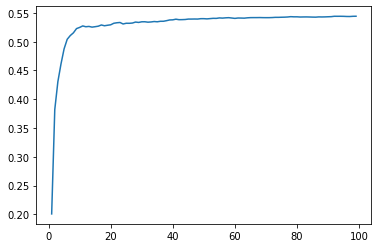

In [51]:
plt.plot(rfr_tune_scores['Test Score'])
plt.show()

In [52]:
rfr_tune_scores.sort_values(by = 'Test Score', ascending = False)

,Train Score,Test Score
99,0.936953,0.544195
92,0.93669,0.544136
94,0.936765,0.544131
98,0.936953,0.544104
93,0.936716,0.544101
...,...,...
5,0.897722,0.487515
4,0.886101,0.461231
3,0.87019,0.430578
2,0.831707,0.38202


## Bagging Regression

In [53]:
BagReg.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [54]:
BagReg.predict(X_test_processed)

array([ 919.1369 ,  836.04506,  596.95628, ..., 4546.81478, 1628.28048,
       1848.2608 ])

In [55]:
bag_est_depths = [estimator.get_depth() for estimator in BagReg.estimators_]
max(bag_est_depths)

38

In [56]:
print(max(bag_est_depths))
print(min(bag_est_depths))

38
31


In [57]:
model_score(BagReg)

(  Score Type     Score
 0   Training  0.917808
 1    Testing  0.499388, 0.49938793409384374, 0.9178080595351246)

### Bagging Regression Tuning using loops

In [ ]:
%%time

bag_n_list = []
for i in range(1, 100):
    bag_n_list.append(i)

estimators = bag_n_list

# Data frame to store the scores
Bag_scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])

# Iterate through the values to find the best number of estimators

for num_estimators in estimators:
  
   BagReg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
  
   BagReg.fit(X_train_processed, y_train)
  
   train_score = BagReg.score(X_train_processed, y_train)
   test_score = BagReg.score(X_test_processed, y_test)
  
   Bag_scores.loc[num_estimators, 'Train Score'] = train_score
   Bag_scores.loc[num_estimators, 'Test Score'] = test_score

In [ ]:
Bag_scores.sort_values(by= 'Test Score', ascending = False)

In [ ]:
bag_best = Bag_scores.index[1]
bag_best

In [ ]:
Bag_tuned = BaggingRegressor(n_estimators = bag_best)

Bag_tuned.fit(X_train_processed, y_train)

model_score(Bag_tuned)

## Decision Tree Regression

In [ ]:
DecTreeReg.get_params()

In [ ]:
DecTreeReg.get_depth()

In [ ]:
DecTreeReg.get_n_leaves()

In [ ]:
model_score(DecTreeReg)

### Decision Tree Regression Tuning using loops

In [ ]:
%%time

depths = range(1,38)

scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])

for depth in depths:

    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)

    dec_tree.fit(X_train_processed, y_train)
    
    train_score = dec_tree.score(X_train_processed, y_train)
    test_score = dec_tree.score(X_test_processed, y_test)
    
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

scores.sort_values(by = 'Test Score', ascending = False)

In [ ]:
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [ ]:
best_score = scores.index[4]

Dec_tuneBest = DecisionTreeRegressor(max_depth = best_score, random_state= 42)

Dec_tuneBest.fit(X_train_processed, y_train)

Dec_tuneBest

# Display all model scores

In [ ]:
print(regression_metrics(rfr_tune))

In [ ]:
print(regression_metrics(Bag_tuned))

In [ ]:
print(regression_metrics(Dec_tuneBest))